In [21]:
import pandas as pd

# Replace 'path_to_file' with the actual path to your CSV file
csv_file_path = "C:\Professional\MS\SHU\Dissertation\Input_data\Race.csv"

# Read the CSV file into a pandas DataFrame, skipping the first row (header)
df = pd.read_csv(csv_file_path, skiprows=1)

In [22]:
# Include the 'Geography' column in the list of columns to extract
desired_columns = ['Geography'] + [col for col in df.columns if col.startswith('Estimate') and ('Percent' not in col)]

# Extract the desired columns
df_extracted = df[desired_columns]

# Display the extracted DataFrame
print(df_extracted)

# Verify the columns that were removed are not required in the analysis
removed_columns = list(set(df.columns) - set(df_extracted.columns))


            Geography  Estimate!!Total:  Estimate!!Total:!!White alone  \
0      860Z200US00601             17126                          14463   
1      860Z200US00602             37895                          23237   
2      860Z200US00603             49136                          36497   
3      860Z200US00606              5751                           3319   
4      860Z200US00610             26153                          15815   
...               ...               ...                            ...   
33769  860Z200US99923                13                             13   
33770  860Z200US99925               917                            411   
33771  860Z200US99926              1445                             92   
33772  860Z200US99927                11                             11   
33773  860Z200US99929              2161                           1274   

       Estimate!!Total:!!Black or African American alone  \
0                                                  

In [42]:
# Create a list of columns related to age
race_columns = [col for col in df_extracted.columns if "Estimate!!Total:!!" in col]

# Create a new DataFrame containing only the 'Geography' and age and sex related columns
race_dataframe = df_extracted[['Geography'] + race_columns]

# Pivot age_dataframe
race_dataframe_melted = pd.melt(df_extracted, id_vars=['Geography'], value_vars=race_columns,
                              var_name='Race', value_name='Total_Population')
race_pivot_table = pd.pivot_table(race_dataframe_melted, index=['Geography', 'Race'], 
                                 values='Race', aggfunc='sum')

# Display the pivot table for age_dataframe
print("\nPivot Table for Race DataFrame:")
print(race_pivot_table)


Pivot Table for Race DataFrame:
                                                                   Total_Population
Geography      Race                                                                
860Z200US00601 Estimate!!Total:!!American Indian and Alaska Na...                13
               Estimate!!Total:!!Asian alone                                      2
               Estimate!!Total:!!Black or African American alone                243
               Estimate!!Total:!!Native Hawaiian and Other Pac...                 0
               Estimate!!Total:!!Some other race alone                         1517
...                                                                             ...
860Z200US99929 Estimate!!Total:!!Some other race alone                           32
               Estimate!!Total:!!Two or more races:                             271
               Estimate!!Total:!!Two or more races:!!Two races...               248
               Estimate!!Total:!!Two or mor

In [43]:
# Convert age_pivot_table to a DataFrame
race_pivot_table = race_pivot_table.reset_index()

# Display the age_pivot_table_df
print("\nRace Pivot Table as DataFrame:")
print(race_pivot_table)


Race Pivot Table as DataFrame:
             Geography                                               Race  \
0       860Z200US00601  Estimate!!Total:!!American Indian and Alaska N...   
1       860Z200US00601                      Estimate!!Total:!!Asian alone   
2       860Z200US00601  Estimate!!Total:!!Black or African American alone   
3       860Z200US00601  Estimate!!Total:!!Native Hawaiian and Other Pa...   
4       860Z200US00601            Estimate!!Total:!!Some other race alone   
...                ...                                                ...   
303961  860Z200US99929            Estimate!!Total:!!Some other race alone   
303962  860Z200US99929               Estimate!!Total:!!Two or more races:   
303963  860Z200US99929  Estimate!!Total:!!Two or more races:!!Two race...   
303964  860Z200US99929  Estimate!!Total:!!Two or more races:!!Two race...   
303965  860Z200US99929                      Estimate!!Total:!!White alone   

        Total_Population  
0               

In [44]:
# Extracting the race as a new variable
race_pivot_table['Race'] = race_pivot_table['Race'].str.split("!!").str[2]
race_pivot_table

,Geography,Race,Total_Population
0,860Z200US00601,American Indian and Alaska Native alone,13
1,860Z200US00601,Asian alone,2
2,860Z200US00601,Black or African American alone,243
3,860Z200US00601,Native Hawaiian and Other Pacific Islander alone,0
4,860Z200US00601,Some other race alone,1517
...,...,...,...
303961,860Z200US99929,Some other race alone,32
303962,860Z200US99929,Two or more races:,271
303963,860Z200US99929,Two or more races:,248
303964,860Z200US99929,Two or more races:,23


In [48]:
race_pivot_table= race_pivot_table.groupby(['Geography','Race']).sum('Total_Population').reset_index()

In [49]:
pivot_table = race_pivot_table.pivot_table(index="Geography", columns="Race", values="Total_Population", aggfunc="sum")


In [50]:
pivot_table

Race,American Indian and Alaska Native alone,Asian alone,Black or African American alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,Two or more races:,White alone
Geography,,,,,,,
860Z200US00601,13,2,243,0,1517,1776,14463
860Z200US00602,44,46,688,0,1475,24810,23237
860Z200US00603,54,38,1681,0,7116,7500,36497
860Z200US00606,21,0,27,0,2123,522,3319
860Z200US00610,0,0,642,0,1480,16432,15815
...,...,...,...,...,...,...,...
860Z200US99923,0,0,0,0,0,0,13
860Z200US99925,335,7,4,0,0,320,411
860Z200US99926,1304,6,0,0,14,58,92


In [51]:
# Combine 'American Indian and Alaska Native alone' and 'Native Hawaiian and Other Pacific Islander alone'
pivot_table['Other races'] = pivot_table['American Indian and Alaska Native alone'] + pivot_table['Native Hawaiian and Other Pacific Islander alone'] + pivot_table['Some other race alone']


In [52]:
pivot_table = pivot_table.drop(['American Indian and Alaska Native alone','Native Hawaiian and Other Pacific Islander alone','Some other race alone'],axis= 1)

In [32]:
# Save the output to a csv
pivot_table.to_csv('C:\professional\ms\shu\dissertation\Output_data\dem\Race_cleaned.csv',index=True)

In [33]:
missing_values = pivot_table.isnull().sum()

print("Missing Values:")
print(missing_values)

Missing Values:
Race
Asian alone                        0
Black or African American alone    0
Two or more races:                 0
White alone                        0
Other races                        0
dtype: int64


C:\Users\nikhi\AppData\Local\Temp\ipykernel_27696\2467883560.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_summed = race_pivot_table.groupby('Race').sum().reset_index()
C:\Users\nikhi\AppData\Local\Temp\ipykernel_27696\2467883560.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_summed, x='Race', y='Total_Population', ci=None)


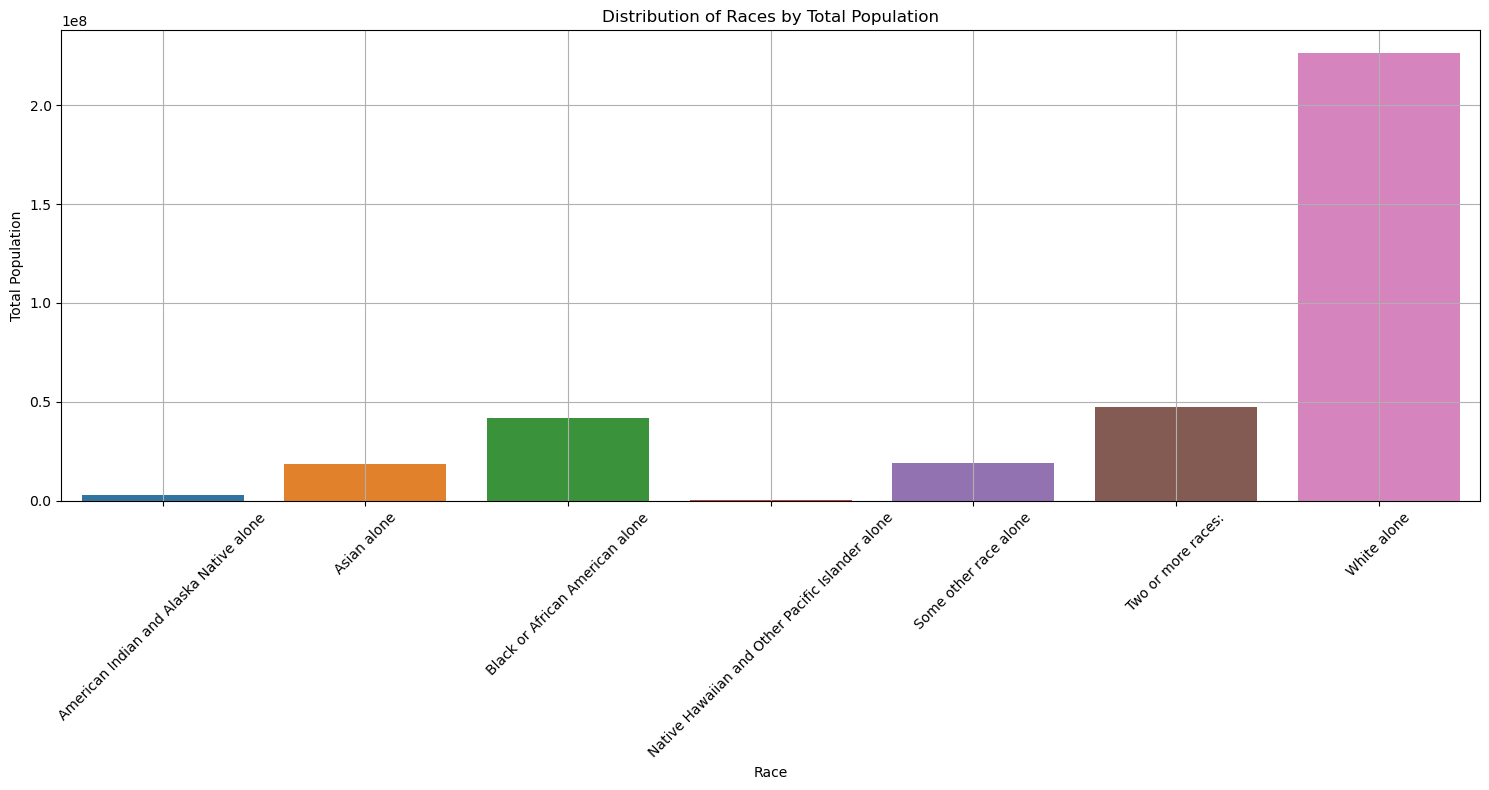

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
df_summed = race_pivot_table.groupby('Race').sum().reset_index()

# Assuming df_race_distribution contains your data
plt.figure(figsize=(15, 8))

# Create a barplot
sns.barplot(data=df_summed, x='Race', y='Total_Population', ci=None)
plt.title('Distribution of Races by Total Population')
plt.xlabel('Race')
plt.ylabel('Total Population')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(True)
plt.tight_layout()

plt.show()


In [72]:
import pandas as pd

# Assuming df_race_distribution contains your data
df_stacked = pivot_table.stack().reset_index()
df_stacked.columns = ['Geography', 'Race', 'Total_Population']
df_summed = df_stacked.groupby('Race').sum().reset_index()

# Print the stacked DataFrame
print(df_stacked)


             Geography                             Race  Total_Population
0       860Z200US00601                      Asian alone                 2
1       860Z200US00601  Black or African American alone               243
2       860Z200US00601               Two or more races:              1776
3       860Z200US00601                      White alone             14463
4       860Z200US00601                      Other races              1530
...                ...                              ...               ...
168865  860Z200US99929                      Asian alone                41
168866  860Z200US99929  Black or African American alone                 3
168867  860Z200US99929               Two or more races:               542
168868  860Z200US99929                      White alone              1274
168869  860Z200US99929                      Other races               572

[168870 rows x 3 columns]


C:\Users\nikhi\AppData\Local\Temp\ipykernel_27696\86493980.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_summed = df_stacked.groupby('Race').sum().reset_index()


C:\Users\nikhi\AppData\Local\Temp\ipykernel_27696\3638415837.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_summed, x='Race', y='Total_Population', ci=None)


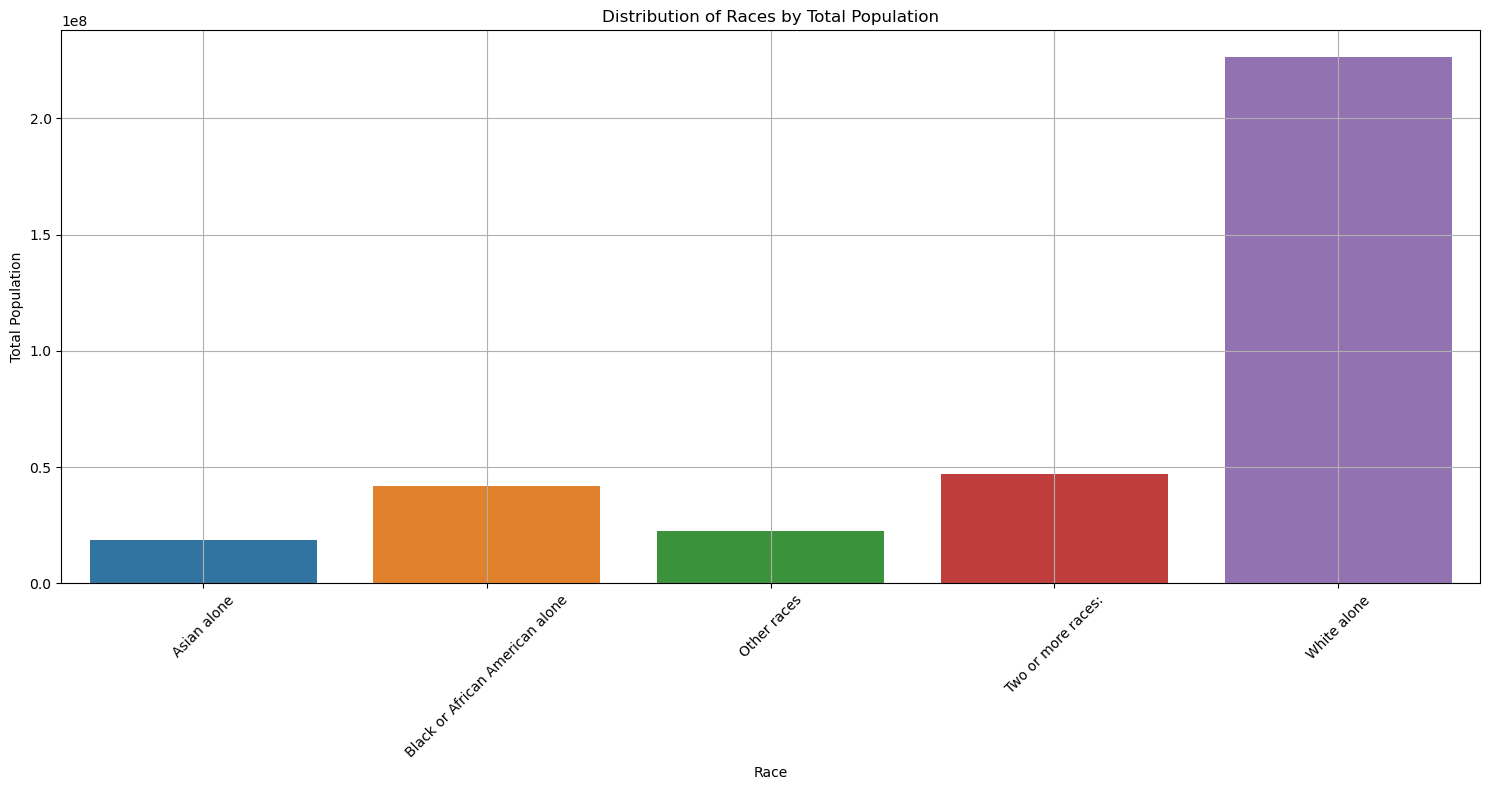

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_race_distribution contains your data
plt.figure(figsize=(15, 8))

# Create a barplot
sns.barplot(data=df_summed, x='Race', y='Total_Population', ci=None)
plt.title('Distribution of Races by Total Population')
plt.xlabel('Race')
plt.ylabel('Total Population')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(True)
plt.tight_layout()

plt.show()


C:\Users\nikhi\AppData\Local\Temp\ipykernel_27696\2497522396.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_summed = df_stacked.groupby('Race').sum().reset_index()


In [70]:
df_summed

,Race,Total_Population
0,Asian alone,18789148
1,Black or African American alone,41722417
2,Other races,22440729
3,Two or more races:,47200186
4,White alone,226480547
